## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.


# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [15]:

from keras.models import Sequential, load_model
from keras.datasets import cifar10
from keras.utils import np_utils,plot_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

model = Sequential()
model.add(Conv2D(filters=64, kernel_size=3, input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(10, activation='softmax'))

In [16]:
# 用 Keras 內建方法檢視模型各層參數量
model2.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 36)        14436     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 36)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 36)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 128)              

In [22]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, 
          epochs=20, 
          batch_size=32, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 522s 10ms/step - loss: 1.2833 - accuracy: 0.5373 - val_loss: 0.9835 - val_accuracy: 0.6475
Epoch 2/20
50000/50000 [==============================] - 528s 11ms/step - loss: 0.8719 - accuracy: 0.6950 - val_loss: 0.7935 - val_accuracy: 0.7222
Epoch 3/20
50000/50000 [==============================] - 517s 10ms/step - loss: 0.7065 - accuracy: 0.7529 - val_loss: 0.7572 - val_accuracy: 0.7405
Epoch 4/20
50000/50000 [==============================] - 509s 10ms/step - loss: 0.5861 - accuracy: 0.7948 - val_loss: 0.7133 - val_accuracy: 0.7583
Epoch 5/20
50000/50000 [==============================] - 504s 10ms/step - loss: 0.4915 - accuracy: 0.8275 - val_loss: 0.7068 - val_accuracy: 0.7746
Epoch 6/20
50000/50000 [==============================] - 504s 10ms/step - loss: 0.4142 - accuracy: 0.8536 - val_loss: 0.7314 - val_accuracy: 0.7752
Epoch 7/20
50000/50000 [==============================] 

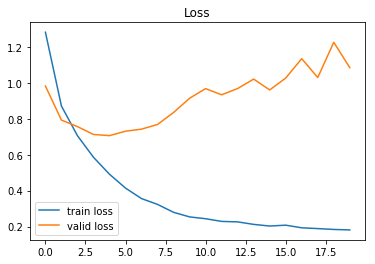

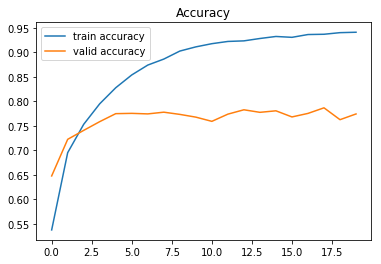

In [27]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()